# 02_Profitability_Analysis.ipynb

## Title: "Profitability Metrics Analysis"`

### Contents:
- Importing libraries.
- Functions for data retrieval and flattening.
- API requests to SEC for company data.
- Data inspection and manipulation.

---

# Set Up the Environment

## Import Libraries

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

## Functions

In [2]:
def prepare_and_sort_financial_data(df, metric):
    """
    Prepares and sorts financial data for a specific metric.

    Args:
    df (DataFrame): The raw DataFrame containing financial data.
    metric (str): The specific financial metric to prepare and sort (e.g., 'OperatingIncomeLoss').

    Returns:
    DataFrame: A DataFrame filtered, cleaned, and sorted for the specific metric.
    """
    # Filter by Metric
    df_metric = df[df['Metric'] == metric]

    # Filter for 10-K filings and ensure 'frame' column is not empty
    filtered_df = df_metric[df_metric['form'] == '10-K']
    filtered_df = filtered_df[filtered_df['frame'].notna()]

    # Drop unnecessary columns
    columns_to_drop = ['accn', 'fy', 'fp', 'form', 'filed']
    filtered_df_cleaned = filtered_df.drop(columns=columns_to_drop)

    # Define a custom sorting key and split into 'year' and 'quarter'
    def custom_sort_key(frame_value):
        year = frame_value[2:6]  # Extract the year part (e.g., '2007')
        quarter_order = {'Q1': 1, 'Q2': 2, 'Q3': 3, 'Q4': 4, 'FY': 5}  # Define order for quarters and FY
        quarter = frame_value[6:] if frame_value[6:] in quarter_order else 'FY'
        return (year, quarter_order[quarter])

    filtered_df_cleaned[['year', 'quarter']] = filtered_df_cleaned['frame'].apply(custom_sort_key).apply(pd.Series)

    # Sort the DataFrame and drop the 'frame' and 'frame_sort_key' columns
    sorted_df = filtered_df_cleaned.sort_values(by=['year', 'quarter']).drop(columns=['frame'])

    return sorted_df

# Example usage with multiple metrics
# operating_income_loss_data = prepare_and_sort_financial_data(raw_data, 'OperatingIncomeLoss')
# net_income_loss_data = prepare_and_sort_financial_data(raw_data, 'NetIncomeLoss')
# revenues_data = prepare_and_sort_financial_data(raw_data, 'Revenues')


# Load Data

## Load Data from CSV File

In [3]:
raw_data = pd.read_csv('combined_df.csv')

In [4]:
# Inspect the first few rows of the dataset
raw_data.head(2)

,EntityName,CIK,Metric,start,end,val,accn,fy,fp,form,filed,frame
0,THE BOEING COMPANY,12927,OperatingIncomeLoss,2007-01-01,2007-12-31,5830000000,0001193125-10-024406,2009,FY,10-K,2010-02-08,CY2007
1,THE BOEING COMPANY,12927,OperatingIncomeLoss,2008-01-01,2008-06-30,3046000000,0001193125-09-152905,2009,Q2,10-Q,2009-07-22,NaN


In [5]:
# Convert 'end' column to datetime for proper sorting
raw_data['end'] = pd.to_datetime(raw_data['end'], format='%Y-%m-%d')


In [6]:
# Check the data types and look for any missing values
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   EntityName  834 non-null    object        
 1   CIK         834 non-null    int64         
 2   Metric      834 non-null    object        
 3   start       834 non-null    object        
 4   end         834 non-null    datetime64[ns]
 5   val         834 non-null    int64         
 6   accn        834 non-null    object        
 7   fy          834 non-null    int64         
 8   fp          834 non-null    object        
 9   form        834 non-null    object        
 10  filed       834 non-null    object        
 11  frame       225 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 78.3+ KB


# Individual Metrics Analysis

## Analysis of Operating Income/Loss

In [7]:
# Filter out the operating income/loss data
operating_income_loss = raw_data[raw_data['Metric'] == 'OperatingIncomeLoss']

In [8]:
operating_income_loss_data = prepare_and_sort_financial_data(raw_data, 'OperatingIncomeLoss')

In [9]:
operating_income_loss_data.head(5)

,EntityName,CIK,Metric,start,end,val,year,quarter
0,THE BOEING COMPANY,12927,OperatingIncomeLoss,2007-01-01,2007-12-31,5830000000,2007,5
6,THE BOEING COMPANY,12927,OperatingIncomeLoss,2008-01-01,2008-12-31,3950000000,2008,5
8,THE BOEING COMPANY,12927,OperatingIncomeLoss,2009-01-01,2009-03-31,1025000000,2009,1
13,THE BOEING COMPANY,12927,OperatingIncomeLoss,2009-04-01,2009-06-30,1529000000,2009,2
18,THE BOEING COMPANY,12927,OperatingIncomeLoss,2009-07-01,2009-09-30,-2151000000,2009,3


In [10]:
print(operating_income_loss_data.describe())

           CIK                            end           val    quarter
count     61.0                             61  6.100000e+01  61.000000
mean   12927.0  2014-12-15 13:46:13.770491904  1.916820e+09   3.180328
min    12927.0            2007-12-31 00:00:00 -1.276700e+10   1.000000
25%    12927.0            2011-12-31 00:00:00  1.307000e+09   2.000000
50%    12927.0            2014-12-31 00:00:00  1.716000e+09   3.000000
75%    12927.0            2017-12-31 00:00:00  2.630000e+09   5.000000
max    12927.0            2022-12-31 00:00:00  1.198700e+10   5.000000
std        0.0                            NaN  3.664814e+09   1.466381


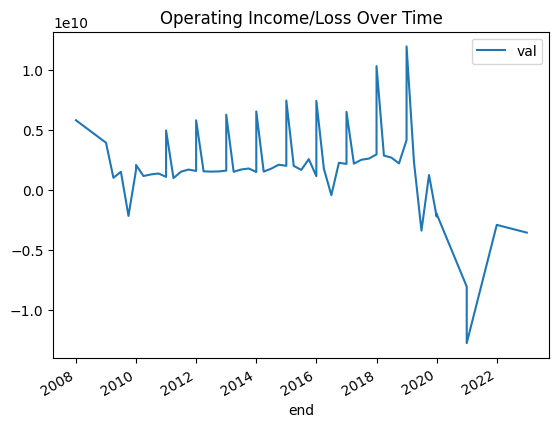

In [11]:
operating_income_loss_data.plot(x='end', y='val', title='Operating Income/Loss Over Time')
plt.show()

## Analysis of Revenues

In [12]:
revenues = raw_data[raw_data['Metric'] == 'Revenues']

In [13]:
revenues_data = prepare_and_sort_financial_data(raw_data, 'Revenues')

In [14]:
revenues_data.head(2)

,EntityName,CIK,Metric,start,end,val,year,quarter
278,THE BOEING COMPANY,12927,Revenues,2007-01-01,2007-12-31,66387000000,2007,5
284,THE BOEING COMPANY,12927,Revenues,2008-01-01,2008-12-31,60909000000,2008,5


           CIK                            end           val    quarter
count     61.0                             61  6.100000e+01  61.000000
mean   12927.0  2014-12-15 13:46:13.770491904  3.564162e+10   3.180328
min    12927.0            2007-12-31 00:00:00  1.491000e+10   1.000000
25%    12927.0            2011-12-31 00:00:00  1.938300e+10   2.000000
50%    12927.0            2014-12-31 00:00:00  2.328600e+10   3.000000
75%    12927.0            2017-12-31 00:00:00  5.815800e+10   5.000000
max    12927.0            2022-12-31 00:00:00  1.011270e+11   5.000000
std        0.0                            NaN  2.622392e+10   1.466381


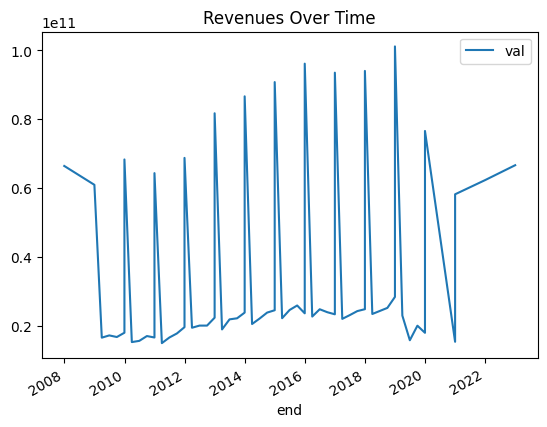

In [15]:
print(revenues_data.describe())
revenues_data.plot(x='end', y='val', title='Revenues Over Time')
plt.show()


## Analysis of Net Income/Loss

In [16]:
# Filter out the operating income/loss data
net_income_loss = raw_data[raw_data['Metric'] == 'NetIncomeLoss']

In [17]:
net_income_loss_data = prepare_and_sort_financial_data(raw_data, 'NetIncomeLoss')

In [33]:
net_income_loss_data.head()

,EntityName,CIK,Metric,start,end,val,year,quarter
556,THE BOEING COMPANY,12927,NetIncomeLoss,2007-01-01,2007-12-31,4074000000,2007,5
562,THE BOEING COMPANY,12927,NetIncomeLoss,2008-01-01,2008-12-31,2672000000,2008,5
564,THE BOEING COMPANY,12927,NetIncomeLoss,2009-01-01,2009-03-31,610000000,2009,1
569,THE BOEING COMPANY,12927,NetIncomeLoss,2009-04-01,2009-06-30,998000000,2009,2
574,THE BOEING COMPANY,12927,NetIncomeLoss,2009-07-01,2009-09-30,-1564000000,2009,3


           CIK                            end           val    quarter
count     61.0                             61  6.100000e+01  61.000000
mean   12927.0  2014-12-15 13:46:13.770491904  1.299951e+09   3.180328
min    12927.0            2007-12-31 00:00:00 -1.187300e+10   1.000000
25%    12927.0            2011-12-31 00:00:00  9.410000e+08   2.000000
50%    12927.0            2014-12-31 00:00:00  1.233000e+09   3.000000
75%    12927.0            2017-12-31 00:00:00  2.279000e+09   5.000000
max    12927.0            2022-12-31 00:00:00  1.046000e+10   5.000000
std        0.0                            NaN  3.194618e+09   1.466381


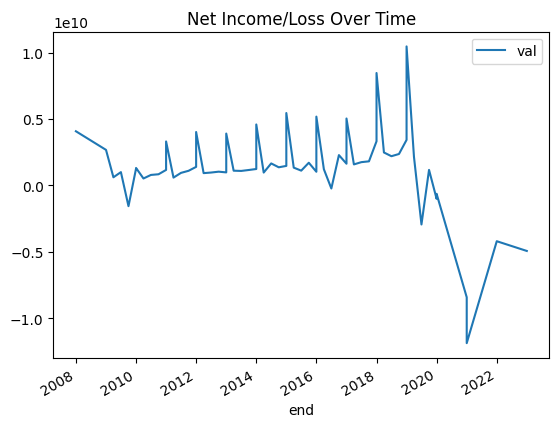

In [18]:
print(net_income_loss_data.describe())
net_income_loss_data.plot(x='end', y='val', title='Net Income/Loss Over Time')
plt.show()


# Merge the Data

In [19]:
df_merged = pd.merge(net_income_loss_data, operating_income_loss_data, 
                     on=['EntityName', 'CIK', 'start', 'end', 'year', 'quarter'], 
                     how='outer', suffixes=('_net_income', '_operating_income'))

In [20]:
df_merged = pd.merge(df_merged, revenues_data, 
                     on=['EntityName', 'CIK', 'start', 'end', 'year', 'quarter'], 
                     how='outer')

In [21]:
df_merged.rename(columns={'val_net_income': 'NetIncomeLoss', 
                          'val_operating_income': 'OperatingIncomeLoss', 
                          'val': 'Revenues'}, inplace=True)

In [22]:
# Filtering out the annual data (rows where quarter is '5')
df_merged_quarterly = df_merged[df_merged['quarter'] != 5]

In [32]:
df_merged_quarterly.head(5)

,EntityName,CIK,Metric_net_income,start,end,NetIncomeLoss,year,quarter,Metric_operating_income,OperatingIncomeLoss,Metric,Revenues
2,THE BOEING COMPANY,12927,NetIncomeLoss,2009-01-01,2009-03-31,610000000,2009,1,OperatingIncomeLoss,1025000000,Revenues,16502000000
3,THE BOEING COMPANY,12927,NetIncomeLoss,2009-04-01,2009-06-30,998000000,2009,2,OperatingIncomeLoss,1529000000,Revenues,17154000000
4,THE BOEING COMPANY,12927,NetIncomeLoss,2009-07-01,2009-09-30,-1564000000,2009,3,OperatingIncomeLoss,-2151000000,Revenues,16688000000
5,THE BOEING COMPANY,12927,NetIncomeLoss,2009-10-01,2009-12-31,1268000000,2009,4,OperatingIncomeLoss,1693000000,Revenues,17937000000
7,THE BOEING COMPANY,12927,NetIncomeLoss,2010-01-01,2010-03-31,519000000,2010,1,OperatingIncomeLoss,1174000000,Revenues,15216000000


# Calculation

**Profitability:**
    
    - `NetIncomeLoss`
    - `Revenues`
    - `OperatingIncomeLoss`
    - **Calculation:** Compare net income to revenue for profit margin. Operating income gives insight into operational efficiency.

In [24]:
# Start by creating a copy of the DataFrame to avoid SettingWithCopyWarning
df_final = df_merged_quarterly.copy()

In [25]:
# Convert financial values from cents to millions for readability
df_final['NetIncomeLoss'] /= 1000000
df_final['Revenues'] /= 1000000
df_final['OperatingIncomeLoss'] /= 1000000

In [26]:
# Calculate Profit Margin where data is available
df_final['ProfitMarginPercent'] = df_final.apply(
    lambda row: (row['NetIncomeLoss'] / row['Revenues']) * 100 
    if pd.notna(row['NetIncomeLoss']) and pd.notna(row['Revenues']) and row['Revenues'] != 0 
    else None, axis=1)

In [27]:
# Construct the 'Quarter' column
df_final['Quarter'] = df_final['year'].astype(str) + '-Q' + df_final['quarter'].astype(str)

In [28]:
# Selecting and renaming columns to match the desired format
df_final = df_final[['EntityName', 'CIK', 'end', 'NetIncomeLoss', 'Revenues', 'OperatingIncomeLoss', 'ProfitMarginPercent', 'Quarter']]
df_final.rename(columns={'EntityName': 'ENTITY', 'end': 'DATE'}, inplace=True)


In [29]:
# Display the first few rows of the final DataFrame
df_final.head(5)

,ENTITY,CIK,DATE,NetIncomeLoss,Revenues,OperatingIncomeLoss,ProfitMarginPercent,Quarter
2,THE BOEING COMPANY,12927,2009-03-31,610.0,16502.0,1025.0,3.696522,2009-Q1
3,THE BOEING COMPANY,12927,2009-06-30,998.0,17154.0,1529.0,5.817885,2009-Q2
4,THE BOEING COMPANY,12927,2009-09-30,-1564.0,16688.0,-2151.0,-9.372004,2009-Q3
5,THE BOEING COMPANY,12927,2009-12-31,1268.0,17937.0,1693.0,7.069187,2009-Q4
7,THE BOEING COMPANY,12927,2010-03-31,519.0,15216.0,1174.0,3.410883,2010-Q1


# Visualization

It seems 2020 had a bumpy ride for both health and aviation! ✈️😷

| ENTITY             | Net Income/Loss | Revenues | Operating Income/Loss | Profit Margin Percent | Quarter |
|--------------------|-----------------|----------|------------------------|-----------------------|---------|
| THE BOEING COMPANY | -8420.0         | 15304.0  | -8049.0                | -55.018296            | 2020-Q4 |


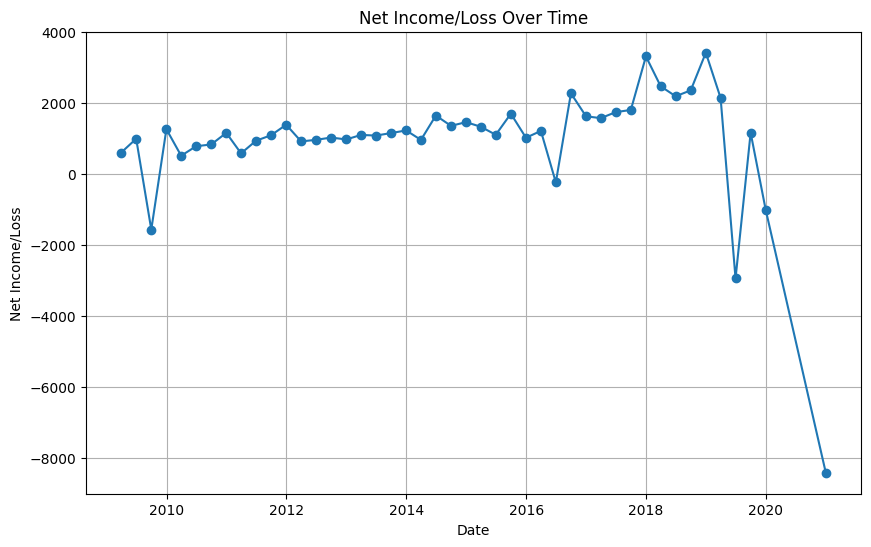

In [30]:
import matplotlib.pyplot as plt

# Filter the DataFrame for NetIncomeLoss and DATE columns
net_income_data = df_final[['DATE', 'NetIncomeLoss']].copy() 

# Set 'DATE' as the index for time-based plotting
net_income_data.set_index('DATE', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(net_income_data.index, net_income_data['NetIncomeLoss'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Net Income/Loss')
plt.title('Net Income/Loss Over Time')
plt.grid(True)
plt.show()
